In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import sklearn as skl

import seaborn as sns


import plotly.graph_objects as go
from scipy.stats import multivariate_normal as mn

In [2]:
data = pd.read_csv('Dataset of Diabetes.csv')
data
data.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [3]:
data.shape

(1000, 11)

In [4]:
data.describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,0.897000
std,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,0.304111
min,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,0.000000
25%,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,1.000000
50%,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,1.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,1.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
AGE      1000 non-null int64
Urea     1000 non-null float64
Cr       1000 non-null int64
HbA1c    1000 non-null float64
Chol     1000 non-null float64
TG       1000 non-null float64
HDL      1000 non-null float64
LDL      1000 non-null float64
VLDL     1000 non-null float64
BMI      1000 non-null float64
CLASS    1000 non-null int64
dtypes: float64(8), int64(3)
memory usage: 86.0 KB


In [6]:
#checks if any of the attributes has missing values
print(data.isnull().any().sum())
print(data.isnull().sum())

0
AGE      0
Urea     0
Cr       0
HbA1c    0
Chol     0
TG       0
HDL      0
LDL      0
VLDL     0
BMI      0
CLASS    0
dtype: int64


In [7]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th{
    border: 1px black solid !important;
    color: black !important
    }
</style>

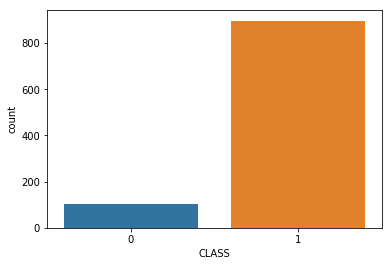

In [8]:
sns.countplot(data['CLASS'])

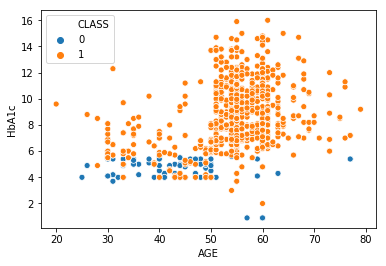

In [9]:
sns.scatterplot(x = 'AGE', y = 'HbA1c', hue = 'CLASS', data = data)

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


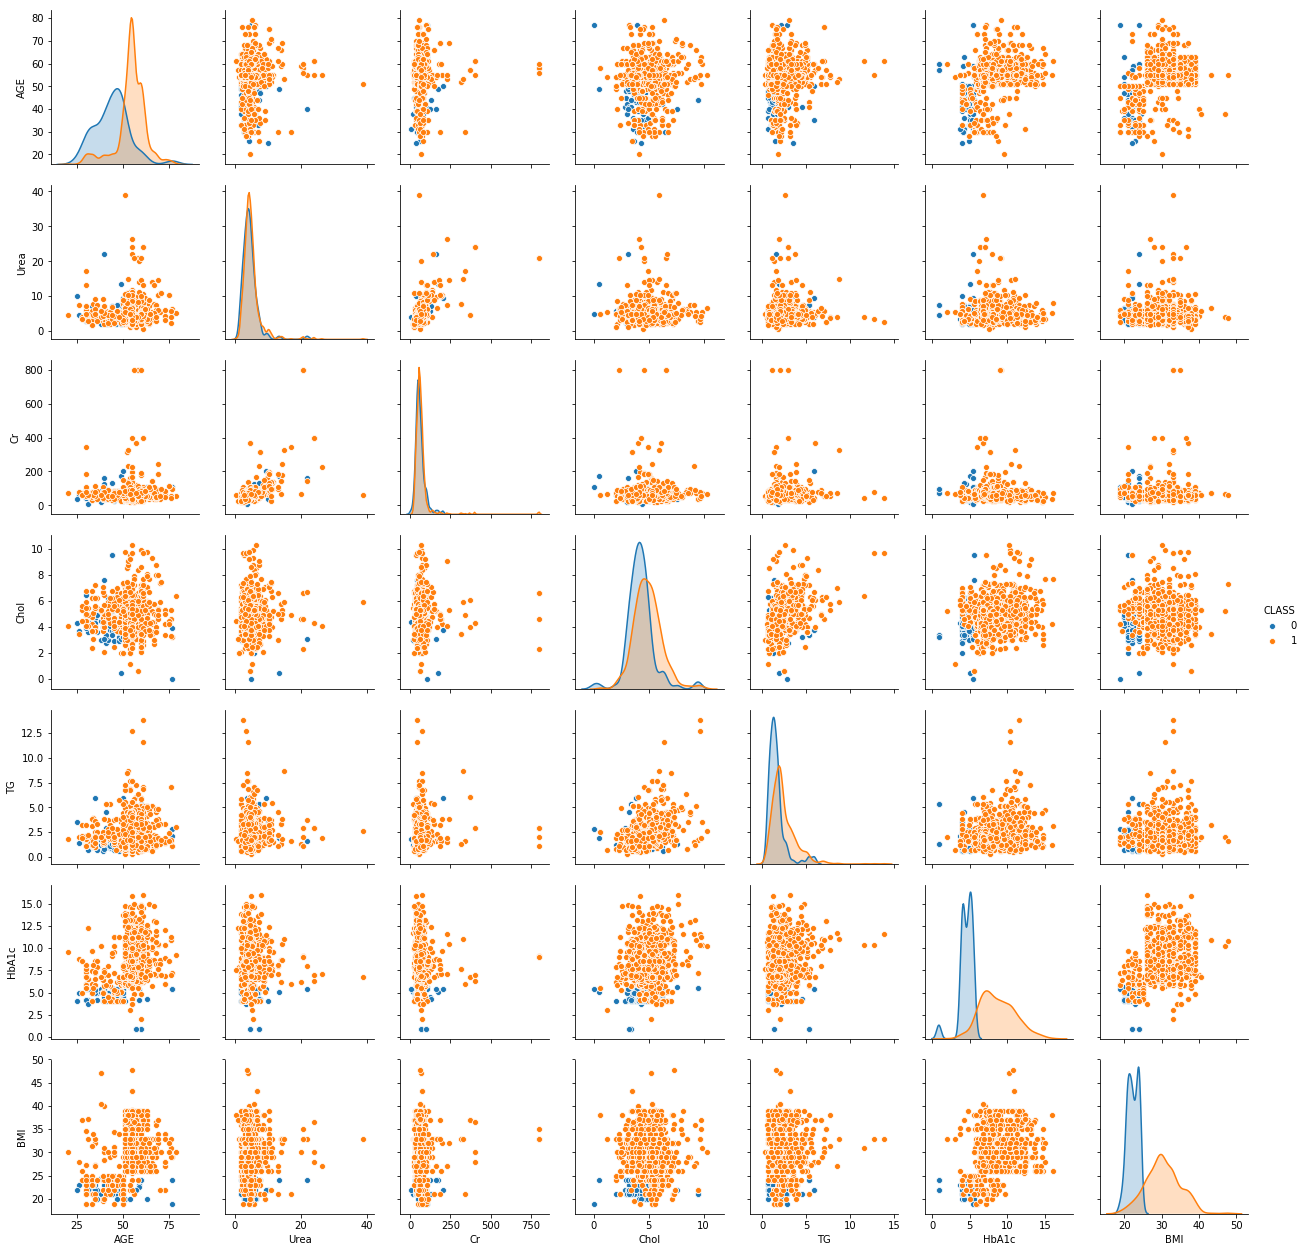

In [10]:
sns.pairplot(data, hue='CLASS', diag_kind = 'auto', vars = ['AGE', 'Urea', 'Cr', 'Chol', 'TG','HbA1c', 'BMI']);

In [11]:
#data correlation table
data.corr()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
AGE,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956,0.358132
Urea,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618,0.051303
Cr,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746,0.034742
HbA1c,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350,0.497838
Chol,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678,0.154675
TG,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757,0.175269
HDL,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409,-0.011517
LDL,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322,-0.004698
VLDL,-0.087903,-0.011191,0.009615,0.073462,0.076294,0.144570,-0.059275,0.062795,1.000000,0.198133,0.084305
BMI,0.375956,0.045618,0.054746,0.413350,0.013678,0.110757,0.072409,-0.067322,0.198133,1.000000,0.492128


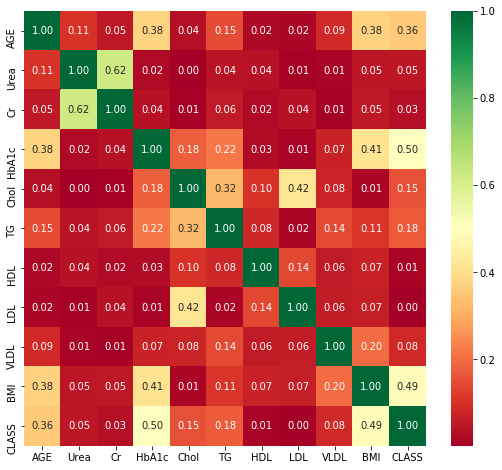

In [12]:
#correlation plot heatmap
plt.figure(figsize=(9,8))
sns.heatmap(np.abs(data.corr()), annot=True, cmap='RdYlGn', fmt='0.2f');

In [13]:
# data covariance table
data.cov()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
AGE,77.426643,2.714236,28.999095,8.453721,0.419791,1.827253,-0.116444,0.158019,-2.833715,16.416212,0.958342
Urea,2.714236,8.615196,109.888254,-0.175549,0.007078,0.168537,-0.071710,-0.023896,-0.120339,0.664448,0.045794
Cr,28.999095,109.888254,3598.169921,-5.686721,-0.554153,4.755403,-0.942992,2.640719,2.112931,16.296043,0.633763
HbA1c,8.453721,-0.175549,-5.686721,6.421172,0.585467,0.776003,0.048420,0.031245,0.681993,5.197754,0.383643
Chol,0.419791,0.007078,-0.554153,0.585467,1.694521,0.586931,0.089247,0.604819,0.363852,0.088354,0.061232
TG,1.827253,0.168537,4.755403,0.776003,0.586931,1.963294,-0.076806,0.024027,0.742129,0.770117,0.074685
HDL,-0.116444,-0.071710,-0.942992,0.048420,0.089247,-0.076806,0.436146,-0.104631,-0.143414,0.237300,-0.002313
LDL,0.158019,-0.023896,2.640719,0.031245,0.604819,0.024027,-0.104631,1.243452,0.256536,-0.372530,-0.001593
VLDL,-2.833715,-0.120339,2.112931,0.681993,0.363852,0.742129,-0.143414,0.256536,13.421960,3.602102,0.093928
BMI,16.416212,0.664448,16.296043,5.197754,0.088354,0.770117,0.237300,-0.372530,3.602102,24.625296,0.742679


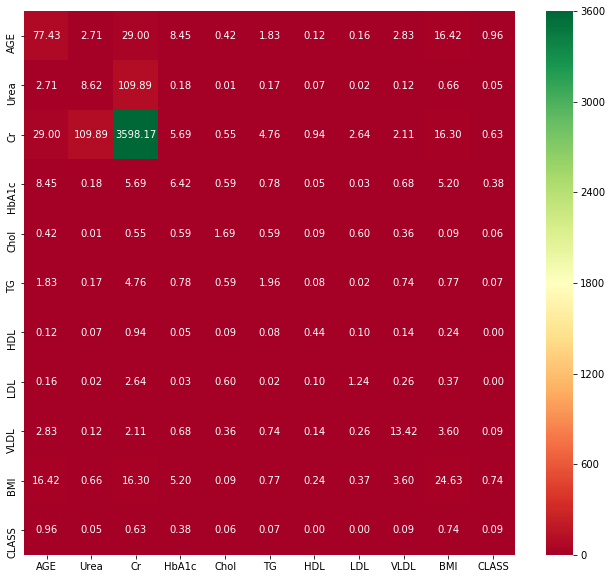

In [14]:
#covariance plot heatmap
plt.figure(figsize=(11,10))
sns.heatmap(np.abs(data.cov()), annot=True, cmap='RdYlGn', fmt='0.2f');

In [15]:
x = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])

In [16]:
x.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0


In [17]:
y.head()

,CLASS
0,0
1,0
2,0
3,0
4,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [20]:
#SVM MODEL

In [21]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', random_state=5)
svclassifier.fit(x_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=5,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
y_pred = svclassifier.predict(x_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_absolute_error, mean_squared_error

In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error (y_test, y_pred))
print('Mean Squared Error:', mean_squared_error (y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_absolute_error (y_test, y_pred)))

[[ 18   7]
 [  3 172]]
              precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.96      0.98      0.97       175

   micro avg       0.95      0.95      0.95       200
   macro avg       0.91      0.85      0.88       200
weighted avg       0.95      0.95      0.95       200

Accuracy: 0.95
Mean Absolute Error: 0.05
Mean Squared Error: 0.05
Root Mean Squared Error: 0.22360679774997896


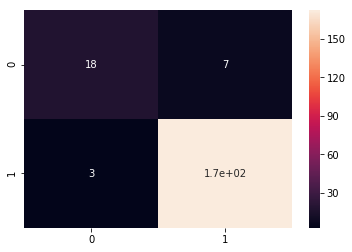

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [26]:
#Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error

In [28]:
x = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])

In [29]:
x.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0


In [30]:
y.head()

,CLASS
0,0
1,0
2,0
3,0
4,0


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [32]:
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state = 1, max_depth = 3)
classifier.fit(x_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [33]:
y_pred = classifier.predict(x_test)

In [34]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error (y_test, y_pred))
print('Mean Squared Error:', mean_squared_error (y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_absolute_error (y_test, y_pred)))

[[ 29   1]
 [  0 170]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.99      1.00      1.00       170

   micro avg       0.99      0.99      0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       1.00      0.99      0.99       200

Accuracy: 0.995
Mean Absolute Error: 0.005
Mean Squared Error: 0.005
Root Mean Squared Error: 0.07071067811865475


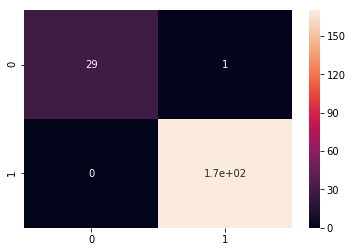

In [35]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot = True)

In [36]:
feature_imp = pd.Series (classifier.feature_importances_,index = x.columns).sort_values (ascending = False)
feature_imp

HbA1c    0.438783
BMI      0.242399
AGE      0.148112
TG       0.039366
Chol     0.033117
VLDL     0.032752
LDL      0.028567
Cr       0.018572
Urea     0.010698
HDL      0.007633
dtype: float64

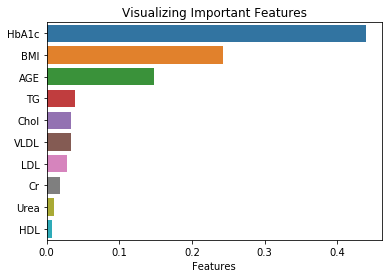

In [37]:
sns.barplot(x=feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.xlabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [38]:
#Using KNN Classifier

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
scaler.fit(data.drop('CLASS', axis = 1))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
scaled_features = scaler.transform(data.drop('CLASS', axis = 1))
sc_data = pd.DataFrame(scaled_features, columns = data.columns[:-1])
sc_data.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,-0.401144,-0.144781,-0.382672,-1.334983,-0.509436,-1.035084,1.810756,-1.085457,-0.369958,-1.124622
1,-3.130017,-0.212954,-0.115804,-1.334983,-0.893730,-0.678063,-0.158692,-0.457398,-0.342649,-1.326239
2,-0.401144,-0.144781,-0.382672,-1.334983,-0.509436,-1.035084,1.810756,-1.085457,-0.369958,-1.124622
3,-0.401144,-0.144781,-0.382672,-1.334983,-0.509436,-1.035084,1.810756,-1.085457,-0.369958,-1.124622
4,-2.334096,0.673299,-0.382672,-1.334983,0.028576,-0.963680,-0.613180,-0.547121,-0.397267,-1.729472


In [43]:
data['CLASS']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
970    1
971    1
972    1
973    1
974    1
975    1
976    1
977    1
978    1
979    1
980    1
981    1
982    1
983    1
984    1
985    1
986    1
987    1
988    1
989    1
990    1
991    1
992    1
993    1
994    1
995    1
996    1
997    1
998    1
999    1
Name: CLASS, Length: 1000, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


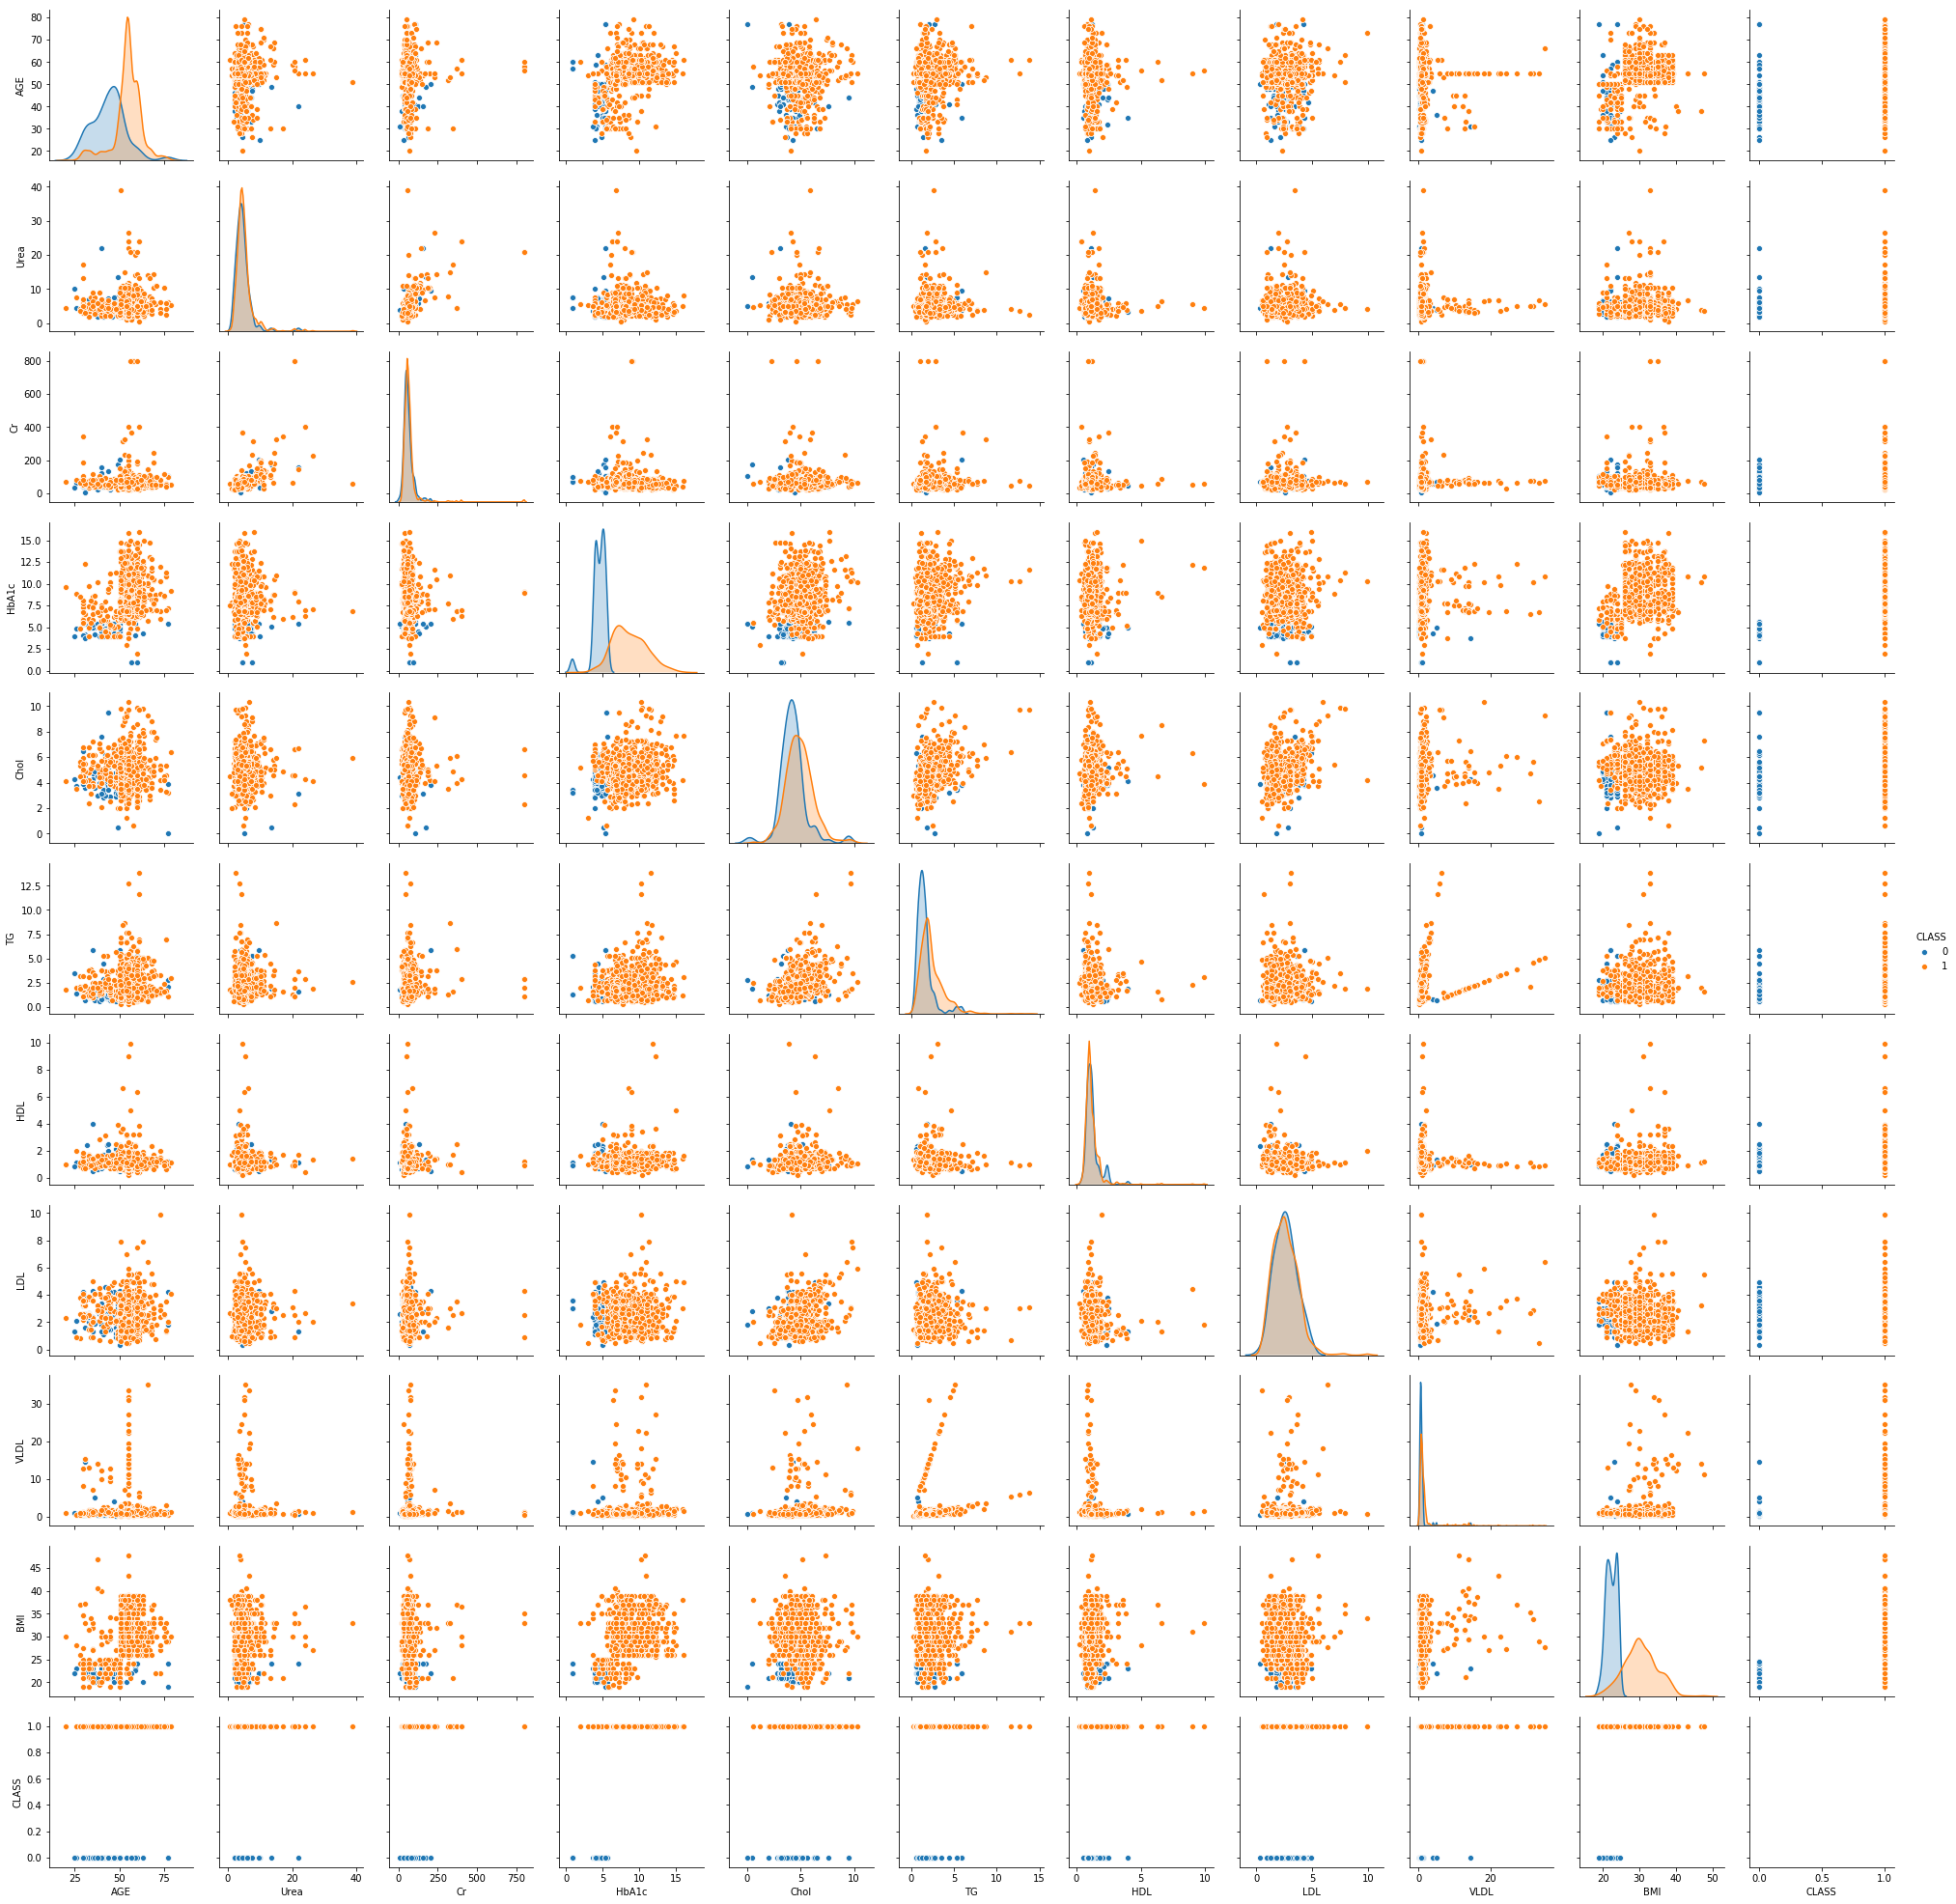

In [44]:
import seaborn as sns
sns.pairplot(data, hue= 'CLASS')

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (scaled_features, data['CLASS'], test_size = 0.2)

In [46]:
#Initialize an energy that stores the error rate
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [48]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [49]:
pred = knn.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, mean_squared_error

In [96]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('Accuracy:', accuracy_score(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error (y_test, pred))
print('Mean Squared Error:', mean_squared_error (y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error (y_test, pred)))

[[  2  18]
 [ 15 165]]
              precision    recall  f1-score   support

           0       0.12      0.10      0.11        20
           1       0.90      0.92      0.91       180

   micro avg       0.83      0.83      0.83       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.82      0.83      0.83       200

Accuracy: 0.835
Mean Absolute Error: 0.165
Mean Squared Error: 0.165
Root Mean Squared Error: 0.406201920231798


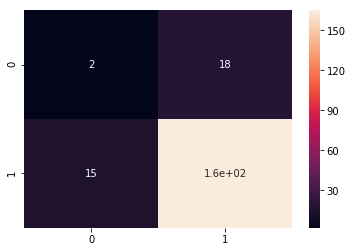

In [97]:
cm = pd.DataFrame(confusion_matrix(y_test, pred))
sns.heatmap(cm, annot = True)

In [52]:
#Using Decison Tree Regressor Model

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.20)

In [54]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='mse', random_state=100, max_depth=4, min_samples_leaf=1)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [78]:
from sklearn.tree import export_graphviz
import pydotplus

export_graphviz (regressor, out_file = 'reg_tree_iray.dot')

In [63]:
y_pred = regressor.predict(x_test)

In [81]:
print(y_pred[4:9])
print(y_test[4:9])

[1. 1. 1. 1. 1.]
     CLASS
103      1
152      1
180      1
968      1
611      1


In [76]:
from sklearn.metrics import mean_squared_error

In [86]:
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('RMSE: ',rmse)

RMSE:  0.06123724356957945


In [ ]:
# Using Decison Tree Classifier Model

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.20)

In [89]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=None, min_samples_leaf=1)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [90]:
from sklearn.tree import export_graphviz
import pydotplus

export_graphviz (regressor, out_file = 'clf_tree_iray.dot')

In [91]:
y_pred = classifier.predict(x_test)

In [92]:
print(y_pred)
print(y_test)

[1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
     CLASS
866      1
123      1
42       0
410      1
498      1
158      1
670      1
168      1
266      1
409      1
262      1
392      1
59       0
14       0
62       0
137      1
565      1
99       0
698      1
438      1
495      1
596      1
622      1
954      1
560      1
779      1
857      1
175      1
511      1
782      1
..     ...
790      1
668      1
387      1
656      1
697      1
491      1
912      1
321      1
303      1
624      1
788      1
806      1
38       0
566      1
376      1
587      1
95       0
808      1
330      1
757      1
737      1
743      1

In [93]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, mean_squared_error

In [94]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error (y_test, y_pred))
print('Mean Squared Error:', mean_squared_error (y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error (y_test, y_pred)))

[[ 19   1]
 [  0 180]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.99      1.00      1.00       180

   micro avg       0.99      0.99      0.99       200
   macro avg       1.00      0.97      0.99       200
weighted avg       1.00      0.99      0.99       200

Accuracy: 0.995
Mean Absolute Error: 0.005
Mean Squared Error: 0.005
Root Mean Squared Error: 0.07071067811865475


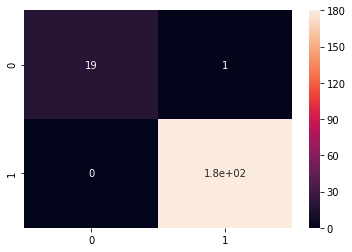

In [98]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot = True)